In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold

In [253]:
# Step 1: Load the dataset
file_path = 'Final_2_cleaned.csv'  
data = pd.read_csv(file_path)

data.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,Current Price,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,267.30,270.82,172.62,James Dimon,Male,74.63,3.0,1.09,317233,1980
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,468.67,491.67,389.29,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,27.65,32.65,26.80,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,5.28,5.36,3.75,Chen Siqing,Male,12.18,3.0,0.97,72000,1980
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,46.30,48.08,32.35,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973


In [257]:
# Step 2: Data Cleaning
# Drop rows with missing values
cleaned_data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in cleaned_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cleaned_data[column] = le.fit_transform(cleaned_data[column])
    label_encoders[column] = le


cleaned_data.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,Current Price,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,109,103,5,5,21,50.0,252.9,4090.7,588.1,...,267.30,270.82,172.62,68,1,74.63,3.0,1.09,317233,1980
1,2.0,48,30,34,5,21,73.4,369.0,1070.0,899.1,...,468.67,491.67,389.29,176,1,0.00,3.0,0.86,392400,1996
2,3.0,6,150,43,4,14,116.9,489.1,661.5,1919.3,...,27.65,32.65,26.80,7,1,996.71,3.0,0.17,67947,2019
3,4.0,4,94,5,5,4,50.4,223.8,6586.0,215.2,...,5.28,5.36,3.75,31,1,12.18,3.0,0.97,72000,1980
4,5.0,37,24,5,5,21,25.0,183.3,3273.8,307.3,...,46.30,48.08,32.35,21,1,29.25,1.0,1.33,213000,1973


In [4]:
# Step 3: Define features (X) and target variable (y)
X = cleaned_data.drop(['Gender', 'CEO', 'Company Name', 'Ticker'], axis=1)  
y = cleaned_data['Gender']  

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

Confusion Matrix:
[[13  1]
 [21 22]]
Accuracy: 0.61


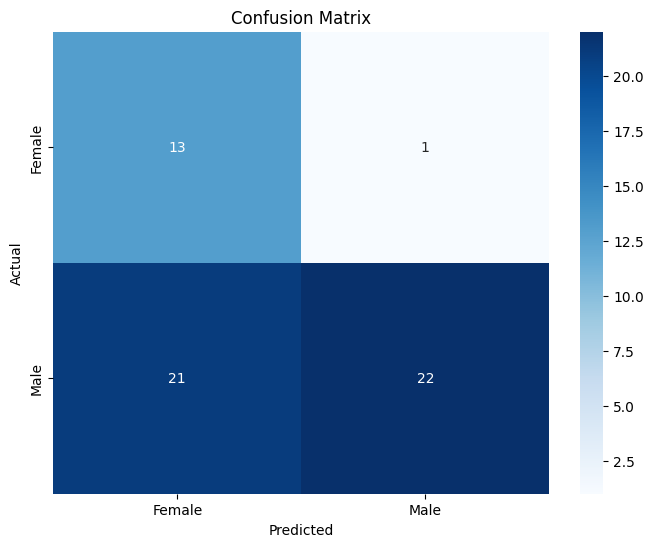

In [5]:
# Step 6: Predict on test set
y_pred = nb_model.predict(X_test)

# Step 7: Evaluate performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

# Step 8: Visualize results
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h1> Industry predixtion </h1>

In [ ]:
# Step 2: Data Cleaning
# Drop unnecessary columns
columns_to_drop = ['Rank', 'Ticker', 'Company Name', 'CEO', 'Gender', 'Founding Year']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)


In [9]:
# Encode categorical variables
label_encoders = {}
for column in ['Industry', 'Sector', 'Country']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

In [7]:
# Step 3: Define features (X) and target variable (y)
X = data_cleaned.drop(['Industry'], axis=1)  # Features (excluding target)
y = data_cleaned['Industry']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = nb_model.predict(X_test)

# Step 6: Evaluate performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 2 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.14


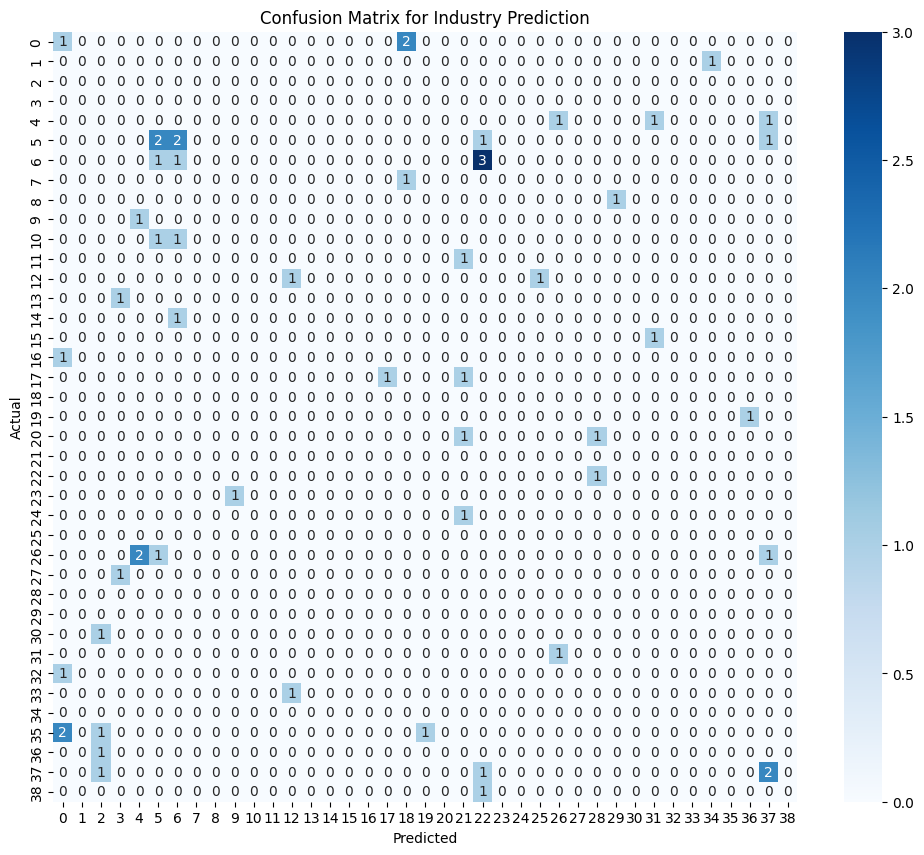

Sample Predicted Industries: ['Apparel Retail' 'Asset Management' 'Semiconductors' 'Auto Manufacturers'
 'Aerospace & Defense' 'Banks - Diversified' 'Consumer Electronics'
 'Auto Manufacturers' 'Other Industrial Metals & Mining'
 'Insurance - Life']


In [8]:
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

# Step 7: Visualize results
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Industry Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decode industry labels back to their original names (optional)
decoded_industries = label_encoders['Industry'].inverse_transform(y_pred)
print("Sample Predicted Industries:", decoded_industries[:10])


<h1> Profit classification </h1>

<h1> 3 method comparisons </h1>

In [260]:
file_path = 'Final_2_cleaned.csv'
df = pd.read_csv(file_path)
df.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,Current Price,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,267.30,270.82,172.62,James Dimon,Male,74.63,3.0,1.09,317233,1980
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,468.67,491.67,389.29,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,27.65,32.65,26.80,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,5.28,5.36,3.75,Chen Siqing,Male,12.18,3.0,0.97,72000,1980
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,46.30,48.08,32.35,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973


In [261]:
# Cleaning data by droping irrelevant columns
df_clean= df.drop(['Rank', 'Ticker', 'Company Name', 'CEO', 'Founding Year'], axis=1).dropna()
df_clean.head(5)

,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),Market Cap(Billion $),PE Ratio,Current Price,52 Week High,52 Week Low,Gender,EBITDA,Rating,Beta,No of Employees
0,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,747.80,13.53,267.30,270.82,172.62,Male,74.63,3.0,1.09,317233
1,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,1010.43,9.48,468.67,491.67,389.29,Male,0.00,3.0,0.86,392400
2,Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,6698.99,16.36,27.65,32.65,26.80,Male,996.71,3.0,0.17,67947
3,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,2449.09,5.03,5.28,5.36,3.75,Male,12.18,3.0,0.97,72000
4,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,352.38,14.42,46.30,48.08,32.35,Male,29.25,1.0,1.33,213000


In [262]:
# Discretize profit into categories
bins = [-np.inf, 15, 50, np.inf]
labels = ['Low', 'Medium', 'High']
df_clean['Profit Category'] = pd.cut(df_clean['Profit (Billion $)'], bins=bins, labels=labels)
df_clean = df_clean.drop(['Profit (Billion $)'], axis=1)

df_clean.head(10)

,Industry,Sector,Country,Revenue (Billion $),Assets (Billion $),Market Value (Billion $),Market Cap(Billion $),PE Ratio,Current Price,52 Week High,52 Week Low,Gender,EBITDA,Rating,Beta,No of Employees,Profit Category
0,Banks - Diversified,Financial Services,United States,252.9,4090.7,588.1,747.80,13.53,267.30,270.82,172.62,Male,74.63,3.0,1.09,317233,Medium
1,Insurance - Diversified,Financial Services,United States,369.0,1070.0,899.1,1010.43,9.48,468.67,491.67,389.29,Male,0.00,3.0,0.86,392400,High
2,Oil & Gas Integrated,Energy,Saudi Arabia,489.1,661.5,1919.3,6698.99,16.36,27.65,32.65,26.80,Male,996.71,3.0,0.17,67947,High
3,Banks - Diversified,Financial Services,China,223.8,6586.0,215.2,2449.09,5.03,5.28,5.36,3.75,Male,12.18,3.0,0.97,72000,High
4,Banks - Diversified,Financial Services,United States,183.3,3273.8,307.3,352.38,14.42,46.30,48.08,32.35,Male,29.25,1.0,1.33,213000,Medium
5,Internet Retail,Consumer Cyclical,United States,590.7,531.0,1922.1,2499.21,50.79,237.68,241.77,151.61,Male,123.82,3.0,1.19,1556000,Medium
6,Banks - Diversified,Financial Services,China,199.8,5403.8,187.5,1487.10,6.57,8.54,9.02,6.65,Male,12.18,3.0,0.97,72000,Medium
7,Software - Infrastructure,Technology,United States,236.6,484.3,3123.1,3085.55,33.45,415.06,468.35,385.58,Male,133.01,3.0,0.90,228000,High
8,Banks - Diversified,Financial Services,China,193.5,5832.9,170.9,1768.58,7.07,5.16,5.44,3.90,Male,12.18,3.0,0.97,72000,Medium
9,Internet Content & Information,Communication Services,United States,317.9,407.4,2177.7,2506.16,27.23,205.60,207.08,131.55,Male,112.39,4.0,1.02,183323,High


In [263]:
# Separate features and target
X = df_clean.drop(['Profit Category','Gender'], axis=1)
y = df_clean['Profit Category']

In [264]:
# Identify categorical and numerical columns
categorical_cols = ['Industry', 'Sector', 'Country']
numerical_cols = ['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(dtype=int), categorical_cols) 
    ],
    remainder='passthrough'  
)

X_processed = preprocessor.fit_transform(X)

# print(X_processed[:5]) 

# # Preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numerical_cols),
#         ('cat', OrdinalEncoder(dtype=int), categorical_cols)  # Use OneHotEncoder if nominal
#     ])

# X_processed = preprocessor.fit_transform(X)
# print(X_processed[:5]) 


In [265]:
# Encode Gender column
df_clean['Gender_Encoded'] = LabelEncoder().fit_transform(df_clean['Gender'])
# df_clean.head(70)

<h1>SMOTE </h1>

In [266]:
class_counts_before = y.value_counts()
print("Class counts before SMOTE:")
print(class_counts_before)

Class counts before SMOTE:
Profit Category
Low       147
Medium     35
High        8
Name: count, dtype: int64


In [267]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

In [268]:
# Count the number of instances for each class after applying SMOTE
class_counts_after = pd.Series(y_balanced).value_counts()
print("\nClass counts after SMOTE:")
print(class_counts_after)


Class counts after SMOTE:
Profit Category
Low       147
Medium    147
High      147
Name: count, dtype: int64


In [271]:
# Different NB Types

# Gaussian NB (Numerical Features)
num_features = ['Revenue (Billion $)', 'Assets (Billion $)', 'Market Value (Billion $)']
X_gauss = df_clean[num_features]
y_gauss = df_clean['Profit Category'] 

# Categorical NB (Ordinal Features)
cat_features = ['Industry', 'Sector', 'Country']
ordinal_encoder = OrdinalEncoder()
X_cat = pd.DataFrame(ordinal_encoder.fit_transform(df_clean[cat_features]), columns=cat_features)
y_cat = df_clean['Profit Category']

# Bernoulli NB (Binary Features)
# Create binary features using "Profit Category" instead of "Profit (Billion $)"
X_bern = df_clean.copy()
X_bern['HighProfit'] = (df_clean['Profit Category'] == 'High').astype(int)  
X_bern = X_bern[['HighProfit', 'Gender_Encoded']] 
y_bern = df_clean['Profit Category'].apply(lambda x: 1 if x == 'High' else 0)

In [272]:
# Train/Test Splits

# Gaussian
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_gauss, y_gauss, test_size=0.3, random_state=42)

# Categorical
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cat, y_cat, test_size=0.3, random_state=42)

# Bernoulli
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bern, y_bern, test_size=0.3, random_state=42)


In [275]:
print("Training Sample")
X_train_g.head(10) 

Training Sample


,Revenue (Billion $),Assets (Billion $),Market Value (Billion $)
26,163.9,2432.5,122.2
38,121.9,263.6,154.1
117,191.7,117.9,73.1
156,29.5,178.7,80.2
133,42.5,97.1,227.2
185,6.5,8.2,23.4
139,74.7,555.3,42.0
2,489.1,661.5,1919.3
46,93.1,158.7,423.9
96,65.4,339.4,74.9


In [276]:
print("Testing Sample")
X_test_g.head(10)

Testing Sample


,Revenue (Billion $),Assets (Billion $),Market Value (Billion $)
175,11.0,11.3,15.3
180,8.7,14.3,79.4
111,96.1,1597.7,31.9
65,90.0,225.4,101.9
101,58.6,105.6,110.5
15,120.1,1959.2,212.9
9,317.9,407.4,2177.7
16,289.7,402.0,228.5
141,97.0,95.7,67.2
124,38.7,698.7,71.5


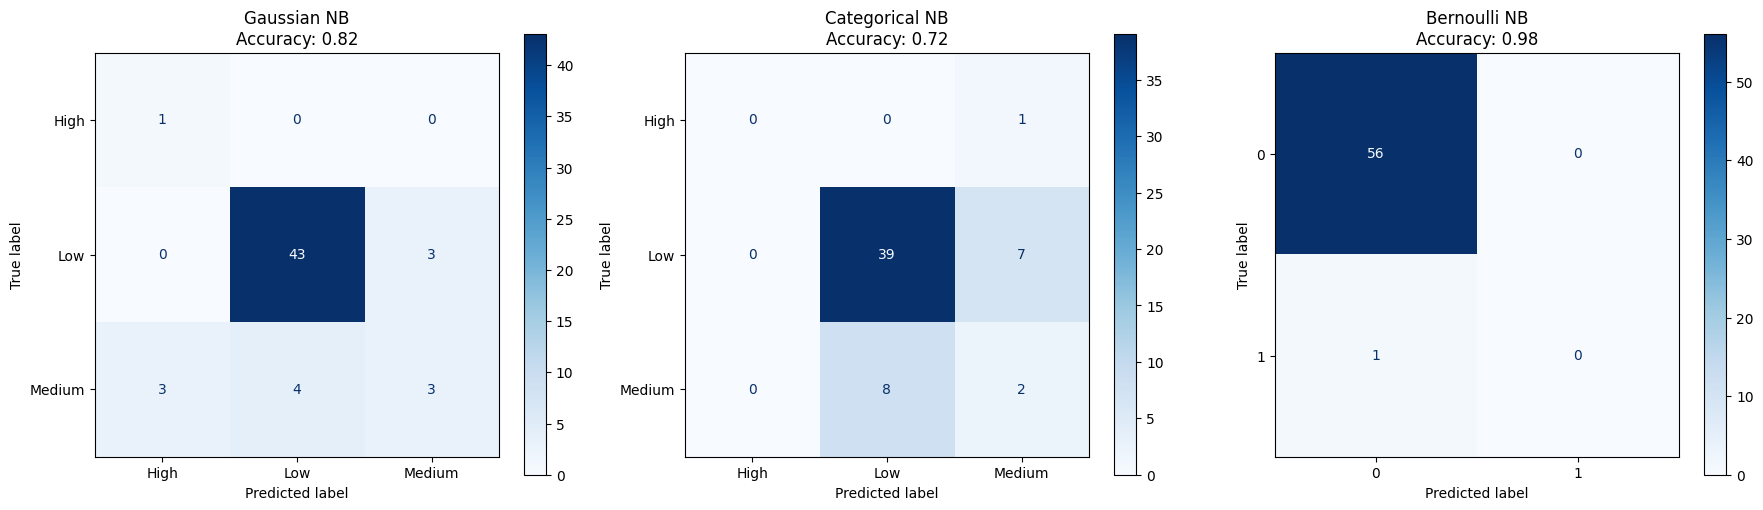

In [279]:
# Model Training and Evaluation
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train_g, y_train_g)
y_pred_g = gnb.predict(X_test_g)
ConfusionMatrixDisplay.from_estimator(gnb, X_test_g, y_test_g, ax=ax[0], cmap='Blues')
ax[0].set_title(f"Gaussian NB\nAccuracy: {gnb.score(X_test_g, y_test_g):.2f}")

# Categorical NB
cnb = CategoricalNB()
cnb.fit(X_train_c, y_train_c)
y_pred_c = cnb.predict(X_test_c)
ConfusionMatrixDisplay.from_estimator(cnb, X_test_c, y_test_c, ax=ax[1], cmap='Blues')
ax[1].set_title(f"Categorical NB\nAccuracy: {cnb.score(X_test_c, y_test_c):.2f}")

# Bernoulli NB
# bnb = BernoulliNB()
bnb = BernoulliNB(alpha=15)  # Adjust alpha as needed
bnb.fit(X_train_b, y_train_b)
y_pred_b = bnb.predict(X_test_b)
ConfusionMatrixDisplay.from_estimator(bnb, X_test_b, y_test_b, ax=ax[2], cmap='Blues')
ax[2].set_title(f"Bernoulli NB\nAccuracy: {bnb.score(X_test_b, y_test_b):.2f}")

plt.tight_layout()
plt.show()

In [211]:
# Detailed Probability Analysis

print("\nGaussian NB Prediction Probabilities:")
print(pd.DataFrame(gnb.predict_proba(X_test_g), columns=gnb.classes_).head(3).to_string(index=False))

print("\nCategorical NB Prediction Probabilities:")
print(pd.DataFrame(cnb.predict_proba(X_test_c), columns=cnb.classes_).head(3).to_string(index=False))

print("\nBernoulli NB Prediction Probabilities:")
print(pd.DataFrame(bnb.predict_proba(X_test_b), columns=bnb.classes_).head(3).to_string(index=False))


Gaussian NB Prediction Probabilities:
    High      Low   Medium
0.000384 0.989125 0.010491
0.000266 0.991047 0.008687
0.002044 0.905934 0.092022

Categorical NB Prediction Probabilities:
    High      Low   Medium
0.070574 0.547167 0.382259
0.042001 0.806337 0.151663
0.059679 0.132200 0.808121

Bernoulli NB Prediction Probabilities:
       0        1
0.960991 0.039009
0.960991 0.039009
0.981584 0.018416


In [277]:
kf_scores_gnb = cross_val_score(gnb, X_train_g, y_train_g, cv=5)
print(f"Gaussian NB Cross-Validation Accuracy: {np.mean(kf_scores_gnb):.2f}")

kf_scores_cnb = cross_val_score(cnb, X_train_c, y_train_c, cv=5)
print(f"Categorical NB Cross-Validation Accuracy: {kf_scores_cnb.mean():.2f}")

df_clean['HighProfit'] = (df_clean['Profit Category'] == 'High').astype(int)

X_bern = df_clean[['Gender_Encoded', 'HighProfit']]  # Binary features
y_bern = df_clean['HighProfit']

# Cross-validation
bnb = BernoulliNB(alpha=0.8)  # Adjust alpha as needed
kf_scores_bnb = cross_val_score(bnb, X_bern.values, y_bern, cv=5)
print(f"Bernoulli NB Cross-Validation Accuracy: {np.mean(kf_scores_bnb):.2f}")


Gaussian NB Cross-Validation Accuracy: 0.81
Categorical NB Cross-Validation Accuracy: 0.79
Bernoulli NB Cross-Validation Accuracy: 1.00
